[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

## Seminar 1: Fun with Word Embeddings

Today we gonna play with word embeddings: train our own little embedding, load one from   gensim model zoo and use it to visualize text corpora.

This whole thing is gonna happen on top of embedding dataset.

__Requirements:__  `pip install --upgrade nltk gensim bokeh` , but only if you're running locally.

In [ ]:
# download the data:
!wget https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1 -O ./quora.txt
# alternative download link: https://yadi.sk/i/BPQrUu1NaTduEw

--2021-04-10 21:57:04--  https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/obaitrix9jyu84r/quora.txt [following]
--2021-04-10 21:57:05--  https://www.dropbox.com/s/dl/obaitrix9jyu84r/quora.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfec938eb0f75214b6d63a4ac8d.dl.dropboxusercontent.com/cd/0/get/BMZdrNOZkCPcucHMo1qRB_rKya9zWZ_lf1XlwKg7gKYq3TgKyWJZ6wO6uSNNwJhk6WpmK-kbVeSGlMIrE3dVd5RFOq_oxmCD2HGPFDpb5yoTXg5kBO82XcLAQORSXxoR2Fx_eZhE9ZuB6GOkE655qm_p/file?dl=1# [following]
--2021-04-10 21:57:05--  https://ucfec938eb0f75214b6d63a4ac8d.dl.dropboxusercontent.com/cd/0/get/BMZdrNOZkCPcucHMo1qRB_rKya9zWZ_lf1XlwKg7gKYq3TgKyWJZ6wO6uSNNwJhk6WpmK-kbVeSGlMIrE3dVd5RFOq_oxm

In [ ]:
import numpy as np

data = list(open("./quora.txt", encoding="utf-8"))
data[50]

"What TV shows or books help you read people's body language?\n"

__Tokenization:__ a typical first step for an nlp task is to split raw data into words.
The text we're working with is in raw format: with all the punctuation and smiles attached to some words, so a simple str.split won't do.

Let's use __`nltk`__ - a library that handles many nlp tasks like tokenization, stemming or part-of-speech tagging.

In [ ]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()

print(tokenizer.tokenize(data[50]))

['What', 'TV', 'shows', 'or', 'books', 'help', 'you', 'read', 'people', "'", 's', 'body', 'language', '?']


In [ ]:
dd = [elem for elem in data if 'books' in elem]

In [ ]:
# TASK: lowercase everything and extract tokens with tokenizer. 
# data_tok should be a list of lists of tokens for each line in data.

data_tok = #YOUR CODE HERE

In [ ]:
assert all(isinstance(row, (list, tuple)) for row in data_tok), "please convert each line into a list of tokens (strings)"
assert all(all(isinstance(tok, str) for tok in row) for row in data_tok), "please convert each line into a list of tokens (strings)"
is_latin = lambda tok: all('a' <= x.lower() <= 'z' for x in tok)
assert all(map(lambda l: not is_latin(l) or l.islower(), map(' '.join, data_tok))), "please make sure to lowercase the data"

In [ ]:
print([' '.join(row) for row in data_tok[:2]])

["can i get back with my ex even though she is pregnant with another guy ' s baby ?", 'what are some ways to overcome a fast food addiction ?']


__Word vectors:__ as the saying goes, there's more than one way to train word embeddings. There's Word2Vec and GloVe with different objective functions. Then there's fasttext that uses character-level models to train word embeddings. 

The choice is huge, so let's start someplace small: __gensim__ is another nlp library that features many vector-based models incuding word2vec.

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(data_tok, 
                 size=32,      # embedding vector size
                 min_count=5,  # consider words that occured at least 5 times
                 window=5).wv  # define context as a 5-word window around the target word

In [ ]:
# now you can get word vectors !
model.get_vector('anything')

array([ 2.2053554 ,  0.3019433 , -5.1447124 , -1.0203764 ,  1.5539147 ,
        1.4644104 ,  0.82753754, -2.1804693 , -2.7234795 , -0.9083622 ,
        0.04593477, -1.7650918 , -0.44616944,  0.952534  , -2.7764645 ,
       -0.7454807 ,  2.584609  , -0.2956782 ,  3.3549104 , -0.7494178 ,
        2.355694  ,  0.58662206, -2.5591471 , -1.648875  , -0.06327178,
       -0.02562645,  1.329198  , -2.600684  , -0.05597322,  2.5877237 ,
        1.0799589 ,  4.0827847 ], dtype=float32)

In [ ]:
# or query similar words directly. Go play with it!
model.most_similar('bread')

[('rice', 0.9446326494216919),
 ('cheese', 0.9291719198226929),
 ('pasta', 0.9244101047515869),
 ('butter', 0.9162769317626953),
 ('sauce', 0.9143440127372742),
 ('beans', 0.9103091955184937),
 ('fruit', 0.9071718454360962),
 ('potato', 0.9050503373146057),
 ('wine', 0.9010690450668335),
 ('banana', 0.8953065872192383)]

### Using pre-trained model

Took it a while, huh? Now imagine training life-sized (100~300D) word embeddings on gigabytes of text: wikipedia articles or twitter posts. 

Thankfully, nowadays you can get a pre-trained word embedding model in 2 lines of code (no sms required, promise).

In [ ]:
import gensim.downloader as api
model = api.load('glove-twitter-100')

[==================================================] 100.0% 387.1/387.1MB downloaded


In [ ]:
model.most_similar(positive=["coder", "money"], negative=["brain"])

[('broker', 0.5820155739784241),
 ('bonuses', 0.5424473285675049),
 ('banker', 0.538511335849762),
 ('designer', 0.5197198390960693),
 ('merchandising', 0.4964233934879303),
 ('treet', 0.49220192432403564),
 ('shopper', 0.4920561909675598),
 ('part-time', 0.49128279089927673),
 ('freelance', 0.4843311905860901),
 ('aupair', 0.4796452522277832)]

### Visualizing word vectors

One way to see if our vectors are any good is to plot them. Thing is, those vectors are in 30D+ space and we humans are more used to 2-3D.

Luckily, we machine learners know about __dimensionality reduction__ methods.

Let's use that to plot 1000 most frequent words

In [ ]:
words = sorted(model.vocab.keys(), 
               key=lambda word: model.vocab[word].count,
               reverse=True)[:1000]

print(words[::100])

['<user>', '_', 'please', 'apa', 'justin', 'text', 'hari', 'playing', 'once', 'sei']


In [ ]:
# for each word, compute it's vector with model
word_vectors = # YOUR CODE

In [ ]:
assert isinstance(word_vectors, np.ndarray)
assert word_vectors.shape == (len(words), 100)
assert np.isfinite(word_vectors).all()

#### Linear projection: PCA

The simplest linear dimensionality reduction method is __P__rincipial __C__omponent __A__nalysis.

In geometric terms, PCA tries to find axes along which most of the variance occurs. The "natural" axes, if you wish.

<img src="https://github.com/yandexdataschool/Practical_RL/raw/master/yet_another_week/_resource/pca_fish.png" style="width:30%">


Under the hood, it attempts to decompose object-feature matrix $X$ into two smaller matrices: $W$ and $\hat W$ minimizing _mean squared error_:

$$\|(X W) \hat{W} - X\|^2_2 \to_{W, \hat{W}} \min$$
- $X \in \mathbb{R}^{n \times m}$ - object matrix (**centered**);
- $W \in \mathbb{R}^{m \times d}$ - matrix of direct transformation;
- $\hat{W} \in \mathbb{R}^{d \times m}$ - matrix of reverse transformation;
- $n$ samples, $m$ original dimensions and $d$ target dimensions;



In [ ]:
from sklearn.decomposition import PCA

# map word vectors onto 2d plane with PCA. Use good old sklearn api (fit, transform)
# after that, normalize vectors to make sure they have zero mean and unit variance
word_vectors_pca = #YOUR CODE

word_vectors_pca = (word_vectors_pca - word_vectors_pca.mean(axis=0)) / word_vectors_pca.std(axis=0)

# and maybe MORE OF YOUR CODE here :)

In [ ]:
word_vectors_pca.shape

(1000, 2)

In [ ]:
assert word_vectors_pca.shape == (len(word_vectors), 2), "there must be a 2d vector for each word"
assert max(abs(word_vectors_pca.mean(0))) < 1e-5, "points must be zero-centered"
assert max(abs(1.0 - word_vectors_pca.std(0))) < 1e-2, "points must have unit variance"

#### Let's draw it!

In [ ]:
%pylab inline
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
draw_vectors(word_vectors_pca[:, 0], word_vectors_pca[:, 1], token=words)

# hover a mouse over there and see if you can identify the clusters

Figure(id='1112', ...)

### Visualizing neighbors with t-SNE
PCA is nice but it's strictly linear and thus only able to capture coarse high-level structure of the data.

If we instead want to focus on keeping neighboring points near, we could use TSNE, which is itself an embedding method. Here you can read __[more on TSNE](https://distill.pub/2016/misread-tsne/)__.

In [ ]:
from sklearn.manifold import TSNE

# map word vectors onto 2d plane with TSNE. hint: don't panic it may take a minute or two to fit.
# normalize them as just lke with pca


word_tsne = #YOUR CODE
word_tsne = (word_tsne - word_tsne.mean(axis=0))/word_tsne

In [ ]:
draw_vectors(word_tsne[:, 0], word_tsne[:, 1], color='green', token=words)

Figure(id='1363', ...)

## Generating names with recurrent neural networks

This time you'll find yourself delving into the heart (and other intestines) of recurrent neural networks on a class of toy problems.

Struggle to find a name for the variable? Let's see how you'll come up with a name for your son/daughter. Surely no human has expertize over what is a good child name, so let us train RNN instead;

It's dangerous to go alone, take these:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# if you're in in colab, uncomment
!wget https://raw.githubusercontent.com/yandexdataschool/Practical_RL/99ae2a3dae648428edbfc41fd10ed688e5365161/week07_%5Brecap%5D_rnn/names -O names

--2021-04-10 20:55:48--  https://raw.githubusercontent.com/yandexdataschool/Practical_RL/99ae2a3dae648428edbfc41fd10ed688e5365161/week07_%5Brecap%5D_rnn/names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55869 (55K) [text/plain]
Saving to: ‘names’

names               100%[===================>]  54.56K  --.-KB/s    in 0.01s   

2021-04-10 20:55:49 (4.29 MB/s) - ‘names’ saved [55869/55869]



### Our data
The dataset contains ~8k earthling names from different cultures, all in latin transcript.

This notebook has been designed so as to allow you to quickly swap names for something similar: deep learning article titles, IKEA furniture, pokemon names, etc.

In [ ]:
import os
start_token = " "

with open("names") as f:
    lines = f.read()[:-1].split('\n')
    lines = [start_token + line for line in lines]

In [ ]:
print ('n samples = ',len(lines))
for x in lines[::1000]:
    print (x)
    


n samples =  7944
 Abagael
 Claresta
 Glory
 Liliane
 Prissie
 Geeta
 Giovanne
 Piggy


max length = 16


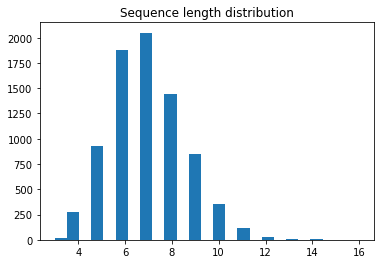

In [ ]:
MAX_LENGTH = max(map(len, lines))
print("max length =", MAX_LENGTH)

plt.title('Sequence length distribution')
plt.hist(list(map(len, lines)),bins=25);

### Text processing

First we need next to collect a "vocabulary" of all unique tokens i.e. unique characters. We can then encode inputs as a sequence of character ids.

In [ ]:
#all unique characters go here
tokens = # you code here <all unique characters in the dataset>


num_tokens = len(tokens)
print ('num_tokens = ', num_tokens)

assert 50 < num_tokens < 60, "Names should contain within 50 and 60 unique tokens depending on encoding"

num_tokens =  55


### Convert characters to integers

Torch is built for crunching numbers, not strings. 
To train our neural network, we'll need to replace characters with their indices in tokens list.

Let's compose a dictionary that does this mapping.

In [ ]:
token_to_id = # you code here <dictionary of symbol -> its identifier (index in tokens list)>



In [ ]:
assert len(tokens) == len(token_to_id), "dictionaries must have same size"

for i in range(num_tokens):
    assert token_to_id[tokens[i]] == i, "token identifier must be it's position in tokens list"

print("Seems alright!")

Seems alright!


In [ ]:
def to_matrix(lines, max_len=None, pad=token_to_id[' '], dtype='int32', batch_first = True):
    """Casts a list of names into rnn-digestable matrix"""
    
    max_len = max_len or max(map(len, lines))
    lines_ix = np.zeros([len(lines), max_len], dtype) + pad

    for i in range(len(lines)):
        line_ix = [token_to_id[c] for c in lines[i]]
        lines_ix[i, :len(line_ix)] = line_ix
        
    if not batch_first: # convert [batch, time] into [time, batch]
        lines_ix = np.transpose(lines_ix)

    return lines_ix

In [ ]:
#Example: cast 4 random names to matrices, pad with zeros
print('\n'.join(lines[::2000]))
print(to_matrix(lines[::2000]))

 Abagael
 Glory
 Prissie
 Giovanne
[[51  2 26 42 14 42 46 48 51]
 [51 45 48 23 29 24 51 51 51]
 [51 28 29 54 31 31 54 46 51]
 [51 45 54 23 50 42 16 16 46]]


In [ ]:
tokens[50:]

['v', ' ', '-', 'J', 'i']

# Recurrent neural network


Recurrent Neural Network is neural networks with the internal state (memory), which are usually used to process step-by-step sequences of inputs.

In other neural networks, all the inputs are independent of each other. But in RNN, all the inputs are related to each other and every input can take influence on the internal state.

RNN are tradictionally used for tasks which need of processing the sequence, i.e speach-to-text, text-to-text (translation), classification and regression of texts.


<img src='https://drive.google.com/uc?export=view&id=1AFEn3FI3cSxeb5LKOyxWz1aIHmCVmWar' width=680px>

Update rule for vector $h$:

$h_t = tanh(h_{t-1}W_h + x_t W_x)$

**Note**: we can use another nonlinearity except tanh.


We can rewrite recurrent neural network as a consecutive application of dense layer to input $x_t$ and previous rnn state $h_t$. This is exactly what we're gonna do now.
<img src="https://github.com/yandexdataschool/Practical_RL/blob/spring19/week07_%5Brecap%5D_rnn/rnn.png?raw=1" width=480>

Since we're training a language model, there should also be:
* An embedding layer that converts character id x_t to a vector.
* An output layer that predicts probabilities of next phoneme

In [ ]:
import torch, torch.nn as nn
import torch.nn.functional as F

class CharRNNCell(nn.Module):
    """
    Implement the scheme above as torch module
    """
    def __init__(self, num_tokens=len(tokens), embedding_size=16, rnn_num_units=64):
        super(self.__class__,self).__init__()
        self.num_units = rnn_num_units
        
        self.embedding = nn.Embedding(num_tokens, embedding_size)
        self.rnn_update = nn.Linear(embedding_size + rnn_num_units, rnn_num_units)
        self.rnn_to_logits = nn.Linear(rnn_num_units, num_tokens)
        
    def forward(self, x, h_prev):
        """
        This method computes h_next(x, h_prev) and log P(x_next | h_next)
        We'll call it repeatedly to produce the whole sequence.
        
        :param x: batch of character ids, int64[batch_size]
        :param h_prev: previous rnn hidden states, float32 matrix [batch, rnn_num_units]
        """
        # get vector embedding of x
        x_emb = self.embedding(x)
        
        # compute next hidden state using self.rnn_update
        # hint: use torch.cat(..., dim=...) for concatenation
        h_next = ###YOUR CODE HERE
       
        
        assert h_next.size() == h_prev.size()
        
        #compute logits for next character probs
        logits = self.rnn_to_logits(h_next)###YOUR CODE
        return h_next, F.log_softmax(logits, -1)
    
    def initial_state(self, batch_size):
        """ return rnn state before it processes first input (aka h0) """
        return torch.zeros(batch_size, self.num_units)

In [ ]:
char_rnn = CharRNNCell()

### RNN loop

Difference between cell and layer

*(I.e. between RNNCell and RNN)*

* A recurrent layer contains a cell object, commands the cell and performs the actual recurrent calculations. 
* The cell contains the core code for the calculations of each step.

Once we've defined a single RNN step, we can apply it in a loop to get predictions on each step.

In [ ]:
def rnn_loop(char_rnn, batch_ix):
    """
    Computes log P(next_character) for all time-steps in lines_ix
    :param lines_ix: an int32 matrix of shape [batch, time], output of to_matrix(lines)
    """
    batch_size, max_length = batch_ix.size()
    hid_state = char_rnn.initial_state(batch_size)
    logprobs = []

    for x_t in batch_ix.transpose(0,1):
        hid_state, logp_next = # YOU CODE HERE  # <-- here we call your one-step code
        logprobs.append(logp_next)
        
    return torch.stack(logprobs, dim=1)

In [ ]:
batch_ix = to_matrix(lines[:5])
batch_ix = torch.tensor(batch_ix, dtype=torch.int64)

cel_obj = CharRNNCell()

logp_seq = rnn_loop(cel_obj, batch_ix)

assert torch.max(logp_seq).data.numpy() <= 0
assert tuple(logp_seq.size()) ==  batch_ix.shape + (num_tokens,)

### Likelihood and gradients

We can now train our neural network to minimize crossentropy (maximize log-likelihood) with the actual next tokens.

To do so in a vectorized manner, we take `batch_ix[:, 1:]` - a matrix of token ids shifted i step to the left so i-th element is acutally the "next token" for i-th prediction

In [ ]:
predictions_logp = logp_seq[:, :-1]
print (predictions_logp.shape)
actual_next_tokens = batch_ix[:, 1:]
print (actual_next_tokens.shape, actual_next_tokens)
print (actual_next_tokens[:,:,None].shape)

logp_next = torch.gather(predictions_logp, dim=2, index=actual_next_tokens[:,:,None])

loss = -logp_next.mean()

torch.Size([5, 7, 55])
torch.Size([5, 7]) tensor([[ 2, 26, 42, 14, 42, 46, 48],
        [ 2, 26, 42, 14, 42, 54, 48],
        [ 2, 26, 26, 46, 51, 51, 51],
        [ 2, 26, 26, 46, 24, 51, 51],
        [ 2, 26, 26, 54, 51, 51, 51]])
torch.Size([5, 7, 1])


In [ ]:
loss

tensor(3.9678, grad_fn=<NegBackward>)

In [ ]:
loss.backward()

In [ ]:
for w in char_rnn.parameters():
    assert w.grad is not None and torch.max(torch.abs(w.grad)).data.numpy() != 0, \
        "Loss is not differentiable w.r.t. a weight with shape %s. Check forward method." % (w.size(),)

AssertionError: ignored

### The training loop

We train our char-rnn exactly the same way we train any deep learning model: by minibatch sgd.

The only difference is that this time we sample strings, not images or sound.

In [ ]:
from IPython.display import clear_output
from random import sample

char_rnn = CharRNNCell()
opt = torch.optim.Adam(char_rnn.parameters())
history = []

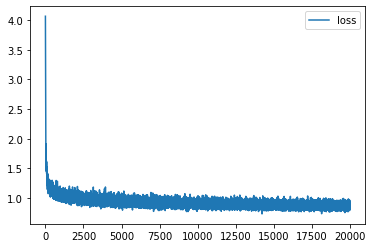

In [ ]:

for i in range(10000):
    batch_ix = to_matrix(sample(lines, 32), max_len=MAX_LENGTH)
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64)
    
    logp_seq = rnn_loop(char_rnn, batch_ix)
    
    # compute loss
    #<YOUR CODE>
    opt.zero_grad()
    predictions_logp = logp_seq[:, :-1]
    actual_next_tokens = batch_ix[:, 1:]

    logp_next = torch.gather(predictions_logp, dim=2, index=actual_next_tokens[:,:,None])
    loss = -logp_next.mean()
    loss.backward()
    opt.step()
    
    #loss = ###YOUR CODE
    
    # train with backprop
    #<YOUR CODE>
    
    history.append(loss.data.numpy())
    if (i+1)%100==0:
        clear_output(True)
        plt.plot(history,label='loss')
        plt.legend()
        plt.show()

assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."

### RNN: sampling
Once we've trained our network a bit, let's get to actually generating stuff. 
All we need is the single rnn step function you have defined in `char_rnn.forward`.

In [ ]:
def generate_sample(char_rnn, seed_phrase=' ', max_length=MAX_LENGTH, temperature=1.0):
    '''
    The function generates text given a phrase of length at least SEQ_LENGTH.
    :param seed_phrase: prefix characters. The RNN is asked to continue the phrase
    :param max_length: maximum output length, including seed_phrase
    :param temperature: coefficient for sampling.  higher temperature produces more chaotic outputs,
                        smaller temperature converges to the single most likely output
    '''
    
    x_sequence = [token_to_id[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)
    hid_state = char_rnn.initial_state(batch_size=1)
    
    #feed the seed phrase, if any
    for i in range(len(seed_phrase) - 1):
        hid_state, _ = char_rnn(x_sequence[:, i], hid_state)
    
    #start generating
    for _ in range(max_length - len(seed_phrase)):
        hid_state, logp_next = char_rnn(x_sequence[:, -1], hid_state)
        p_next = F.softmax(logp_next / temperature, dim=-1).data.numpy()[0]
        
        # sample next token and push it back into x_sequence
        next_ix = np.random.choice(num_tokens,p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)
        
    return ''.join([tokens[ix] for ix in x_sequence.data.numpy()[0]])

In [ ]:
for _ in range(10):
    print(generate_sample(char_rnn))

 Marlene        
 Emmetha        
 Wash           
 Dosaine        
 Neabald        
 Carleen        
 Hartelle       
 Briann         
 Shellash       
 Shewnel        


In [ ]:
for _ in range(10):
    print(generate_sample(char_rnn, seed_phrase=' Covid'))

 Covidra        
 Covidlot       
 Covid          
 Covider        
 Covidemah      
 Covider        
 Covide         
 Covidra        
 Covidora       
 Covidie        


### Try it out!
You've just implemented a recurrent language model that can be tasked with generating any kind of sequence, so there's plenty of data you can try it on:

* Novels/poems/songs of your favorite author
* News titles/clickbait titles
* Source code of Linux or Tensorflow
* Molecules in [smiles](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) format
* Melody in notes/chords format
* Ikea catalog titles
* Pokemon names
* Cards from Magic, the Gathering / Hearthstone

If you're willing to give it a try, here's what you wanna look at:
* Current data format is a sequence of lines, so a novel can be formatted as a list of sentences. Alternatively, you can change data preprocessing altogether.
* While some datasets are readily available, others can only be scraped from the web. Try `Selenium` or `Scrapy` for that.
* Make sure MAX_LENGTH is adjusted for longer datasets. There's also a bonus section about dynamic RNNs at the bottom.
* More complex tasks require larger RNN architecture, try more neurons or several layers. It would also require more training iterations.
* Long-term dependencies in music, novels or molecules are better handled with LSTM or GRU

__Good hunting!__

### More seriously

What we just did is a manual low-level implementation of RNN. While it's cool, i guess you won't like the idea of re-writing it from scratch on every occasion. 

As you might have guessed, torch has a solution for this. To be more specific, there are two options:
* `nn.RNNCell(emb_size, rnn_num_units)` - implements a single step of RNN just like you did. Basically concat-linear-tanh
* `nn.RNN(emb_size, rnn_num_units` - implements the whole rnn_loop for you.

There's also `nn.LSTMCell` vs `nn.LSTM`, `nn.GRUCell` vs `nn.GRU`, etc. etc.

In this example we'll rewrite the char_rnn and rnn_loop using high-level rnn API.

In [ ]:
class CharRNNLoop(nn.Module):
    def __init__(self, num_tokens=num_tokens, emb_size=16, rnn_num_units=64):
        super(self.__class__, self).__init__()
        self.emb = nn.Embedding(num_tokens, emb_size)
        self.rnn = nn.RNN(emb_size, rnn_num_units, batch_first=True)
        self.hid_to_logits = nn.Linear(rnn_num_units, num_tokens)
        
    def forward(self, x):
        h_seq, _ = self.rnn(self.emb(x))
        next_logits = self.hid_to_logits(h_seq)
        next_logp = F.log_softmax(next_logits, dim=-1)
        return next_logp
    
model = CharRNNLoop()

In [ ]:
# the model applies over the whole sequence
batch_ix = to_matrix(sample(lines, 32), max_len=MAX_LENGTH)
batch_ix = torch.tensor(batch_ix, dtype=torch.int64)

logp_seq = model(batch_ix)

# compute loss. This time we use nll_loss with some duct tape
loss = F.nll_loss(logp_seq[:, 1:].contiguous().view(-1, num_tokens), 
                  batch_ix[:, :-1].contiguous().view(-1))

loss.backward()

Here's another example

In [ ]:
import torch, torch.nn as nn
import torch.nn.functional as F

class CharLSTMCell(nn.Module):
    """
    Implements something like CharRNNCell, but with LSTM
    """
    def __init__(self, num_tokens=len(tokens), embedding_size=16, rnn_num_units=64):
        super(self.__class__,self).__init__()
        self.num_units = rnn_num_units
        self.emb = nn.Embedding(num_tokens, embedding_size)
        self.lstm = nn.LSTMCell(embedding_size, rnn_num_units)
        self.rnn_to_logits = nn.Linear(rnn_num_units, num_tokens)
        
    def forward(self, x, prev_state):
        (prev_h, prev_c) = prev_state
        (next_h, next_c) = self.lstm(self.emb(x), (prev_h, prev_c))
        logits = self.rnn_to_logits(next_h)
        
        return (next_h, next_c), F.log_softmax(logits, -1)
    
    def initial_state(self, batch_size):
        """ LSTM has two state variables, cell and hid """
        return torch.zeros(batch_size, self.num_units), torch.zeros(batch_size, self.num_units)
    
char_lstm = CharLSTMCell()

In [ ]:
# the model applies over the whole sequence
batch_ix = to_matrix(sample(lines, 32), max_len=MAX_LENGTH)
batch_ix = torch.tensor(batch_ix, dtype=torch.int64)

logp_seq = rnn_loop(char_lstm, batch_ix)

# compute loss. This time we use nll_loss with some duct tape
loss = F.nll_loss(logp_seq[:, 1:].contiguous().view(-1, num_tokens), 
                  batch_ix[:, :-1].contiguous().view(-1))

loss.backward()

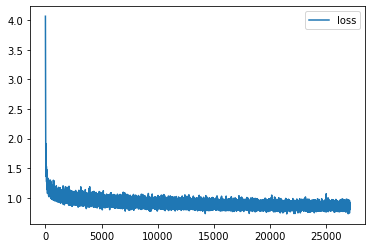

KeyboardInterrupt: ignored

In [ ]:
for i in range(10000):
    batch_ix = to_matrix(sample(lines, 32), max_len=MAX_LENGTH)
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64)
    
    logp_seq = rnn_loop(char_rnn, batch_ix)
    
    # compute loss
    #<YOUR CODE>
    opt.zero_grad()
    predictions_logp = logp_seq[:, :-1]
    actual_next_tokens = batch_ix[:, 1:]

    logp_next = torch.gather(predictions_logp, dim=2, index=actual_next_tokens[:,:,None])
    loss = -logp_next.mean()
    loss.backward()
    opt.step()
    
    #loss = ###YOUR CODE
    
    # train with backprop
    #<YOUR CODE>
    
    history.append(loss.data.numpy())
    if (i+1)%100==0:
        clear_output(True)
        plt.plot(history,label='loss')
        plt.legend()
        plt.show()

assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."

In [ ]:
for _ in range(10):
    print(generate_sample(char_rnn))

 Lio            
 Vafe           
 Vill           
 Auslita        
 Almaumon       
 Jinon          
 Cornemarin     
 Jealyn         
 Yolayno        
 Graigera       


__Bonus quest: __ implement a model that uses 2 LSTM layers (the second lstm uses the first as input) and train it on your data.